In [1]:
import pickle

# Replace 'filename.pkl' with the path to your actual pickle file
with open('/home/edu/embeddings/all_manifest_embeddings.pkl', 'rb') as file:
    data = pickle.load(file)  # `data` is a dict



In [2]:
print(f'Length of `data` (number of samples) = {len(data.keys())}')
list(data.keys())[:10]

Length of `data` (number of samples) = 10289


['dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_0.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_1.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_10.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_100.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_101.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_102.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_103.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_104.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_105.wav',
 'dataset@Alejandro_Kohler_Vargas@Alejandro_Kohler_Vargas_106.wav']

Embeddings in `data` are indexed by `'folder@label@filename'`.

The dictionary `embeddings` will to store the representations grouped by label

In [3]:
import numpy as np
# Store embeddings grouped by label
embeddings_by_label = {}
embeddings = []
labels = []
# Iterate over the dictionary items
for key, value in data.items():
    # Parse the key to extract the label
    _, label, _ = key.split('@')

    # If the label is not in the dictionary, add it with an empty list
    if label not in embeddings_by_label:
        embeddings_by_label[label] = []

    # Append the embedding to the correct label list
    embeddings_by_label[label].append(value)

    labels.append(label)
    embeddings.append(value)


embeddings = np.array(embeddings)

In [4]:
type(embeddings)

numpy.ndarray

In [5]:
unique_labels = list(set(labels))
unique_labels.sort()
print(f'Length of `embeddings` (number of labels) = {len(unique_labels)}')
unique_labels[:10]

Length of `embeddings` (number of labels) = 57


['Alejandro_Kohler_Vargas',
 'Alihuen_Antileo_Navarrete',
 'Antonia_Rivas_Palma',
 'Beatriz_Hevia_Willer',
 'Carlos_Frontaura_Rivera',
 'Carmen_Montoya_Mayorga',
 'Carolina_Navarrete_Rubio',
 'Catalina_Adriana_Lagos_Tschorne',
 'Diego_Vargas_Castillo',
 'Domingo_Lovera_Parmo']

We calculate the centroid of each label and store it in `centroids`

In [6]:
centroids_by_label = {}

# Calculate centroid for each label
for label, emb_list in embeddings_by_label.items():
    # Convert list of arrays into a single numpy array
    emb_array = np.array(emb_list)
    # Calculate the mean along axis 0 (mean of each column)
    centroid = np.mean(emb_array, axis=0)
    centroids_by_label[label] = centroid

In [1]:
def cosine_similarity(vec1, vec2):
    """
    Compute the cosine similarity between two vectors.
    Since embeddings are already normalized, we can use the dot product as the cosine similarity.
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    cosine_similarity = dot_product / (norm_vec1 * norm_vec2)
    return (cosine_similarity + 1) / 2  # Normalized cosine similarity

def arccos(x):
    """
    Compute the arccosine of a value in radians.
    """
    cos_theta = 2*x - 1  # De-normalize cosine similarity
    return np.arccos(cos_theta)

We calculate the cosine similarity between each sample `i` and each centroid `j` and store it in `similarity_matrix`

In [8]:
# List of centroids
centroids = list(centroids_by_label.values())
centroid_labels = list(centroids_by_label.keys())

# Create an empty matrix to store cosine similarities
similarity_matrix = np.zeros((len(embeddings), len(centroids)))

# Compute cosine similarity for each embedding against each centroid
for i, embedding in enumerate(embeddings):
    for j, centroid in enumerate(centroids):
        similarity_matrix[i, j] = cosine_similarity(embedding, centroid)

In [9]:
# Assuming `centroids` and `embeddings_by_label` are already defined
mean_cosine_similarities = {}

# Iterate over each label for embeddings
for label_i, embeddings in embeddings_by_label.items():
    mean_cosine_similarities[label_i] = {}
    # Convert embeddings list to an array for efficiency in computation
    embeddings_array = np.array(embeddings)
    
    # Iterate over each centroid
    for label_j, centroid in centroids_by_label.items():
        # Compute cosine similarity between each embedding and the centroid
        similarities = [cosine_similarity(embedding, centroid) for embedding in embeddings_array]
        # Calculate the mean of these similarities
        mean_cosine_similarities[label_i][label_j] = np.mean(similarities)

# `mean_cosine_similarities` is a dictionary where keys are label_i and values are dictionaries
# with keys as label_j and values as the mean cosine similarity from embeddings of label_i to centroid of label_j

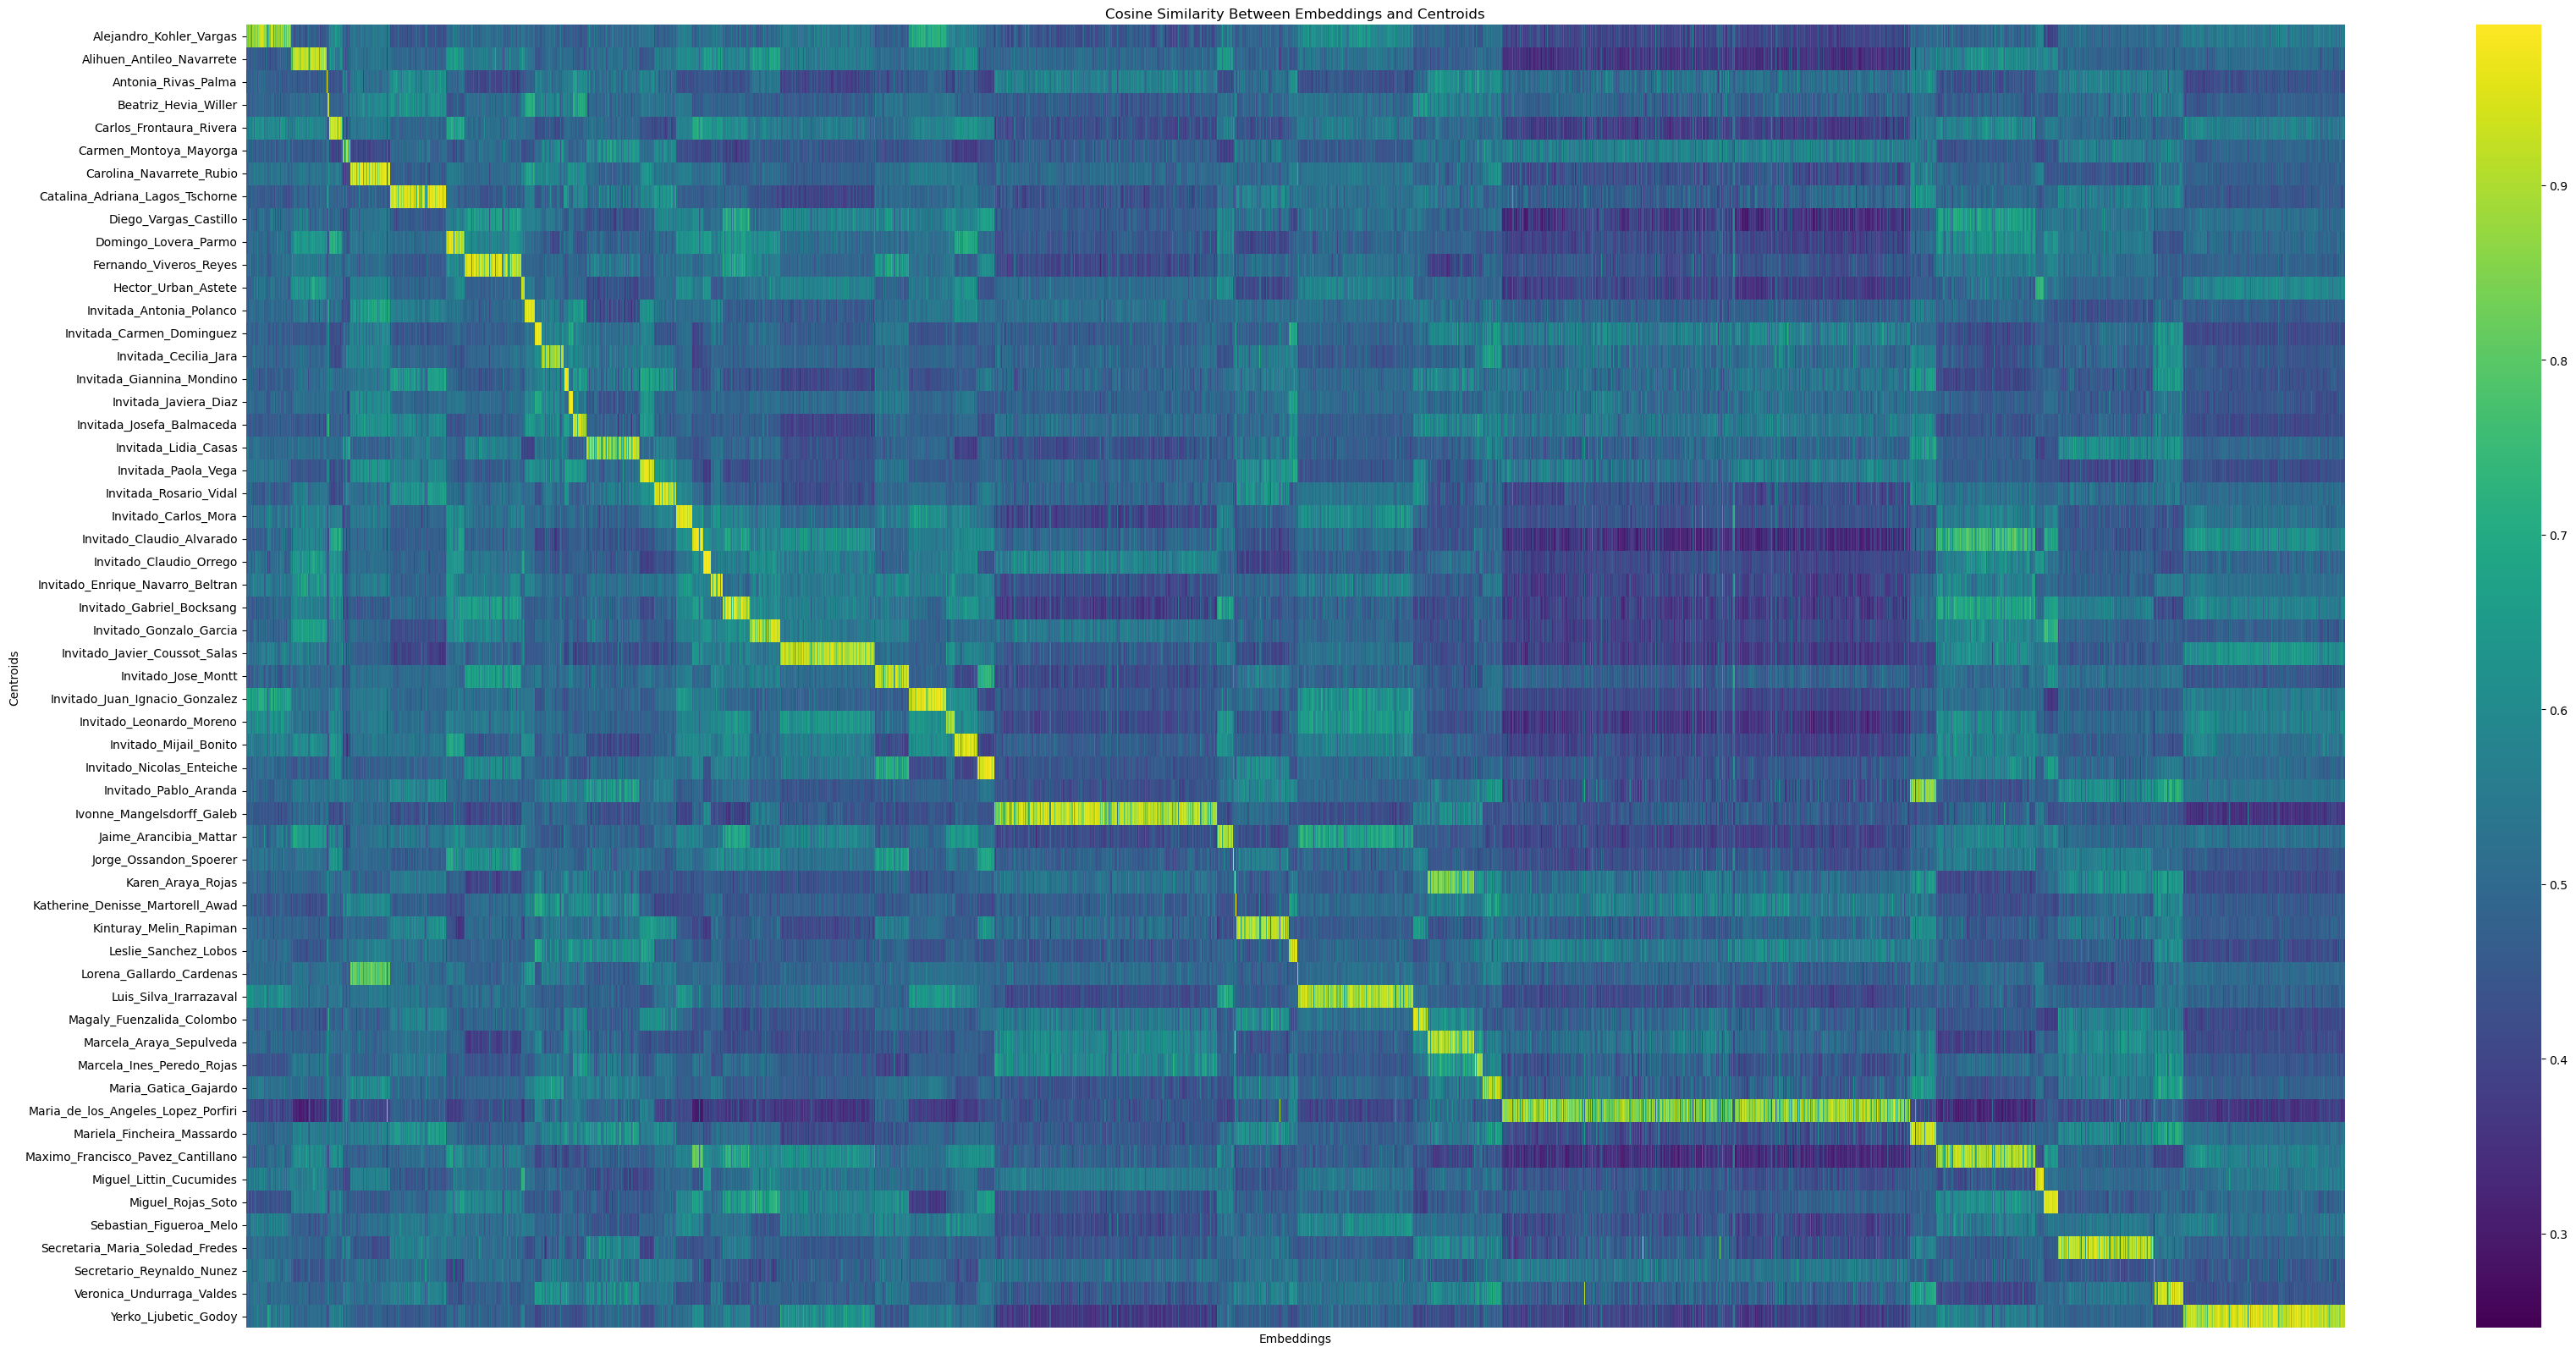

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))  # Adjust the size to handle the large matrix
# ax = sns.heatmap(similarity_matrix > .7, cmap='viridis', xticklabels=unique_labels, yticklabels=False)
ax = sns.heatmap(similarity_matrix.T, cmap='viridis', xticklabels=False, yticklabels=unique_labels)
ax.set_title('Cosine Similarity Between Embeddings and Centroids')
ax.set_xlabel('Embeddings')
ax.set_ylabel('Centroids')
plt.show()

In [ ]:
import numpy as np

# Example cosine similarity data
cosine_similarities = np.array([...])  # Your cosine similarity data here

target_value = 0.95 

# Find the index where the value first exceeds the target value and stays above it
target_index = next(i for i, val in enumerate(cosine_similarities) if val >= target_value and all(cosine_similarities[i:] >= target_value))

print(f"Number of audios to reach and maintain {target_value:.2f}: {target_index}")

In [51]:
subject_cen.shape

NameError: name 'subject_cen' is not defined

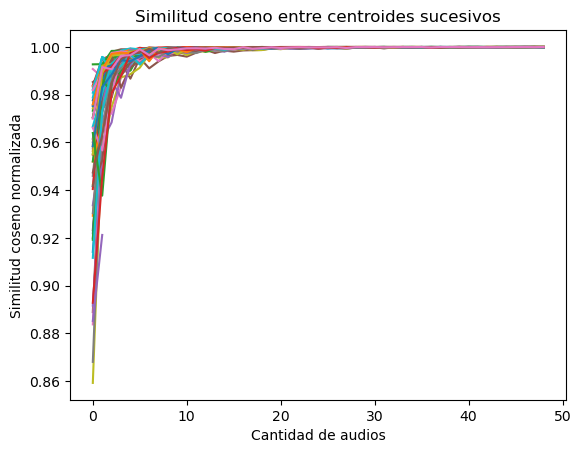

In [21]:
for l in unique_labels:
    centroid_drift(l)


In [22]:
import pandas as pd

def shuffle_embeddings(label: str, num_shuffles: int = 100,
                   embeddings_per_shuffle: int = 50) -> np.ndarray:
    """
    Pseudo-randomly shuffles embeddings for a given label.
    """
    subject_embeddings = np.array(embeddings_by_label[label])
    if embeddings_per_shuffle > subject_embeddings.shape[0]:
        return None
    base_seed = hash(label) & 0xffffffff  # Use `& 0xffffffff` for a 32-bit integer
    shuffled_embeddings = np.empty((num_shuffles, embeddings_per_shuffle, subject_embeddings.shape[1]), 
                                   dtype=subject_embeddings.dtype)

    for i in range(num_shuffles):
        seed = base_seed + i
        np.random.seed(seed)
        permuted_indices = np.random.permutation(subject_embeddings.shape[0])[:embeddings_per_shuffle]
        shuffled_embeddings[i] = subject_embeddings[permuted_indices]

    return shuffled_embeddings

def centroid_drift(label: str, plot: bool = True):
    """
    Characterizes the centroid drift for a given label.
    The centroid drift is calculated as the cosine similarity between the centroid of the first n embeddings
    and the centroid of the first n+1 embeddings.
    We use 100 sequences of the embeddings reordenated randomly to avoid any bias.
    """
    shuffled_embeddings = shuffle_embeddings(label)
    if shuffled_embeddings is None:
        return None
    subject_centroids = np.empty(shuffled_embeddings.shape, dtype=shuffled_embeddings.dtype)

    for i in range(shuffled_embeddings.shape[0]):
        embeddings_sequence = shuffled_embeddings[i]
        for j in range(embeddings_sequence.shape[0]):
            embeddings = embeddings_sequence[:j+1]
            centroid = np.mean(embeddings, axis=0)
            subject_centroids[i, j] = centroid
    

    similitudes = np.empty((shuffled_embeddings.shape[0], shuffled_embeddings.shape[1] - 1, 1))
    for i in range(similitudes.shape[0]):
        for j in range(similitudes.shape[1]):
            cen1 = subject_centroids[i, j]
            cen2 = subject_centroids[i, j+1]
            sim = cosine_similarity(cen1, cen2)
            similitudes[i, j] = sim

    mean = np.mean(similitudes, axis=0).flatten()
    std = np.std(similitudes, axis=0).flatten()
    return mean, std

In [29]:
sns.set_style('whitegrid')
import pandas as pd
centroids_drift_df = {}
valid_labels = []

for label in unique_labels:
    drift = centroid_drift(label)
    if drift is not None:
        valid_labels.append(label)
        mean, std = drift
        centroids_drift_df[f'{label}_mean'] = mean
        centroids_drift_df[f'{label}_std'] = std

centroids_drift_df = pd.DataFrame(centroids_drift_df)


centroids_drift_df.head()


Alejandro_Kohler_Vargas_mean  Alejandro_Kohler_Vargas_std  \
0                      0.923332                     0.023652   
1                      0.966912                     0.011002   
2                      0.981799                     0.005780   
3                      0.988274                     0.004315   
4                      0.992014                     0.002706   

   Alihuen_Antileo_Navarrete_mean  Alihuen_Antileo_Navarrete_std  \
0                        0.955166                       0.022202   
1                        0.982000                       0.008857   
2                        0.990293                       0.005084   
3                        0.994021                       0.003035   
4                        0.996136                       0.001907   

   Carlos_Frontaura_Rivera_mean  Carlos_Frontaura_Rivera_std  \
0                      0.957418                     0.024151   
1                      0.982987                     0.009059   
2                      0.991995                     0.004191   
3                      0.994691                     0.003065   
4                      0.996765                     0.001834   

   Carolina_Navarrete_Rubio_mean  Carolina_Navarrete_Rubio_std  \
0                       0.966282                      0.028010   
1                       0.987284                      0.010403   
2                       0.993283                      0.005525   
3                       0.996234                      0.002719   
4                       0.997378                      0.001662   

   Catalina_Adriana_Lagos_Tschorne_mean  Catalina_Adriana_Lagos_Tschorne_std  \
0                              0.950566                             0.034452   
1                              0.981221                             0.013703   
2                              0.990436                             0.006196   
3                              0.994361                             0.003924   
4                              0.996250                             0.002302   

   ...  Maximo_Francisco_Pavez_Cantillano_mean  \
0  ...                                0.937968   
1  ...                                0.974856   
2  ...                                0.985738   
3  ...                                0.991648   
4  ...                                0.993972   

   Maximo_Francisco_Pavez_Cantillano_std  Miguel_Rojas_Soto_mean  \
0                               0.026127                0.969695   
1                               0.013103                0.986221   
2                               0.006250                0.992779   
3                               0.003652                0.995614   
4                               0.002984                0.997430   

   Miguel_Rojas_Soto_std  Secretaria_Maria_Soledad_Fredes_mean  \
0               0.022604                              0.950300   
1               0.011890                              0.979244   
2               0.007267                              0.989682   
3               0.003365                              0.992609   
4               0.001508                              0.995043   

   Secretaria_Maria_Soledad_Fredes_std  Veronica_Undurraga_Valdes_mean  \
0                             0.029585                        0.962445   
1                             0.010130                        0.984354   
2                             0.005227                        0.991780   
3                             0.003901                        0.995003   
4                             0.002736                        0.996562   

   Veronica_Undurraga_Valdes_std  Yerko_Ljubetic_Godoy_mean  \
0                       0.020828                   0.955203   
1                       0.009061                   0.982468   
2                       0.004383                   0.990356   
3                       0.002538                   0.994382   
4                       0.002048                   0.996049   

   Yerko_Ljubet

In [25]:
len(centroids_drift_df)

49

/tmp/ipykernel_30398/2565220072.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7.5, 5))


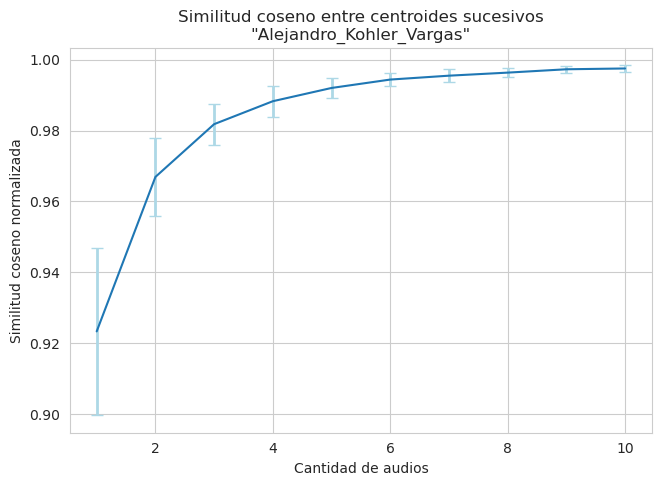

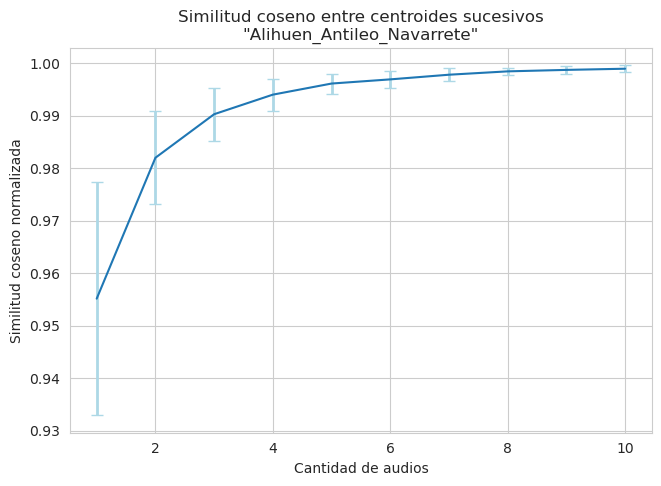

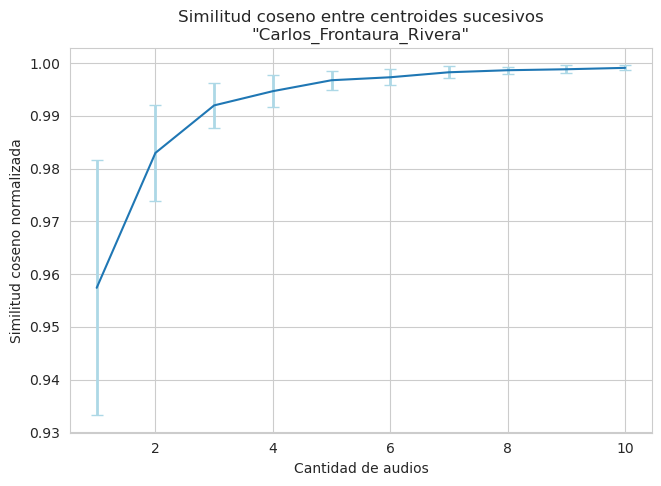

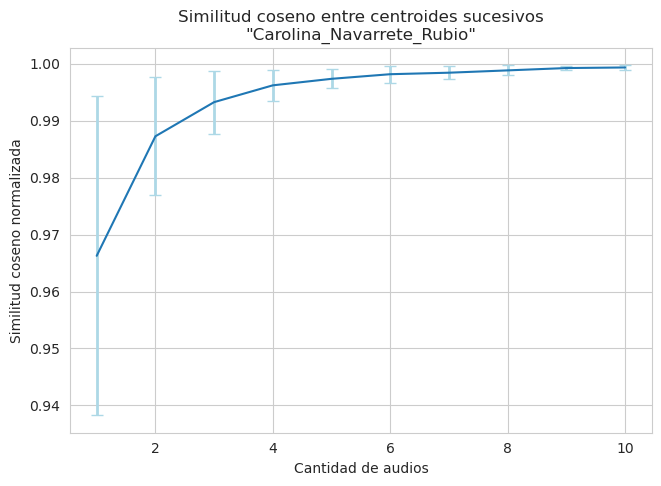

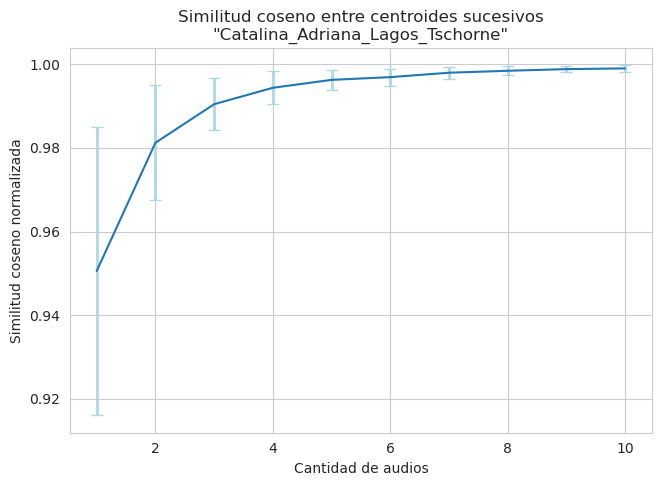

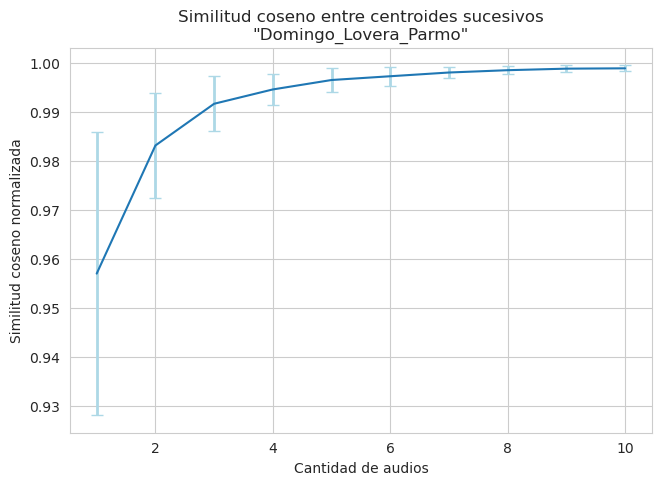

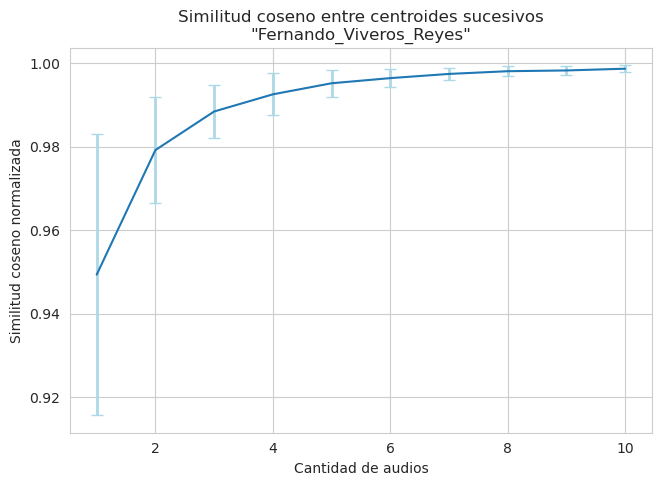

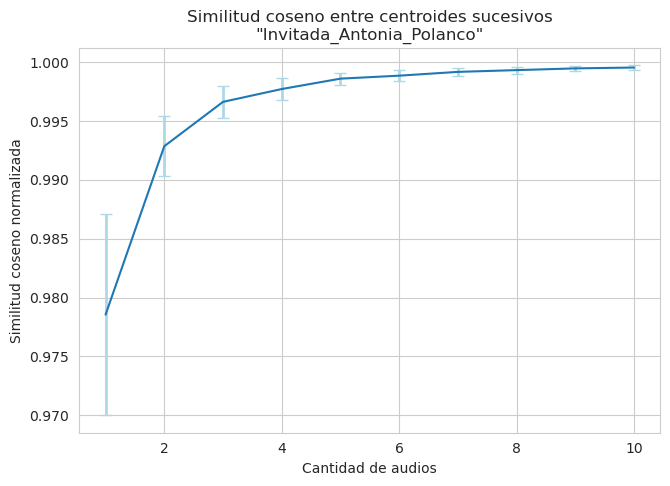

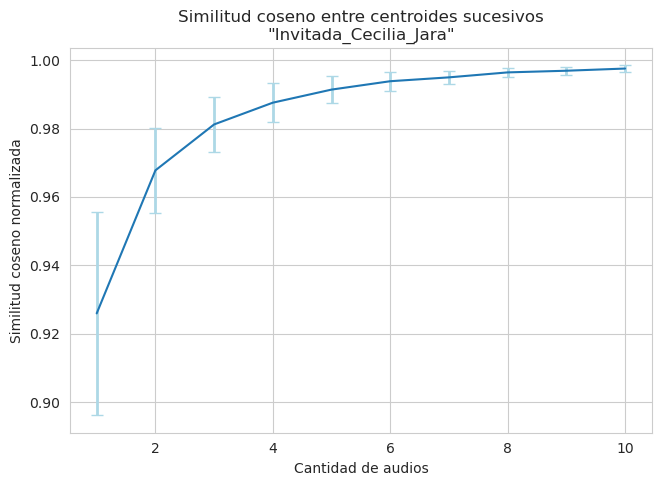

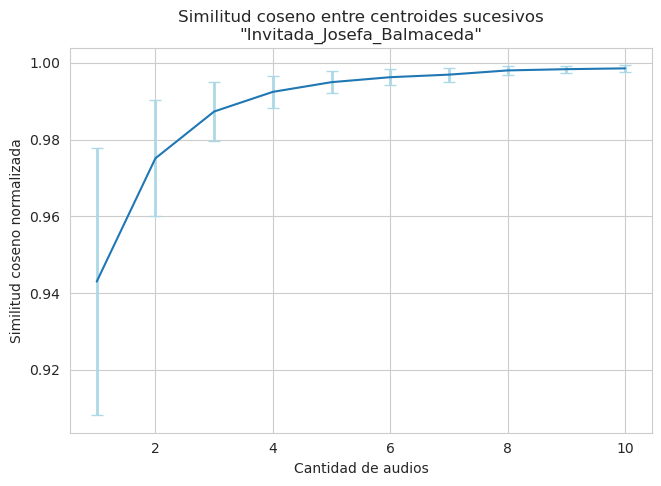

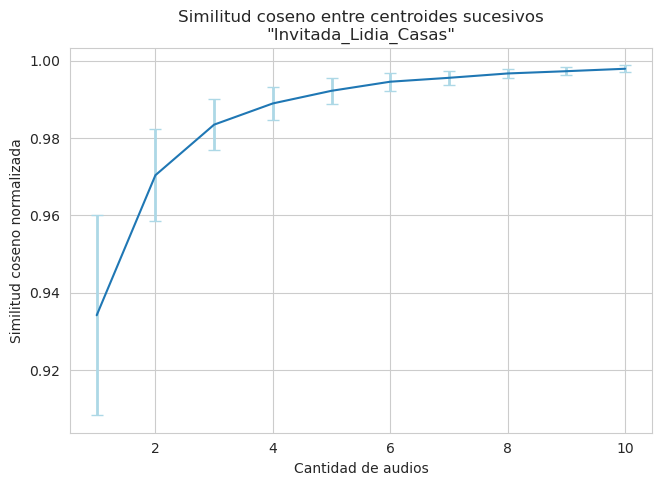

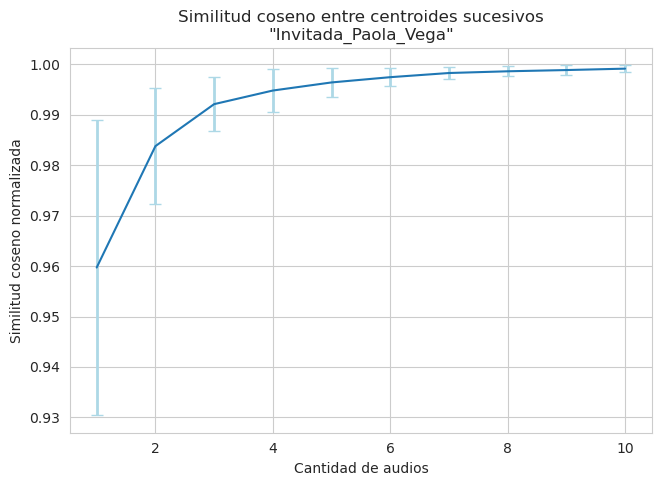

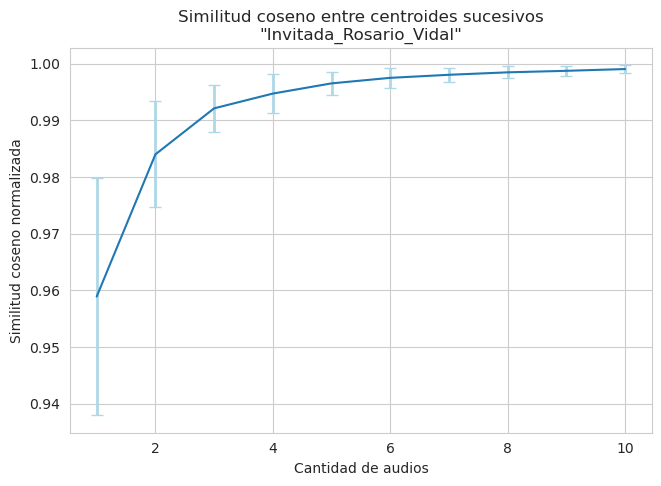

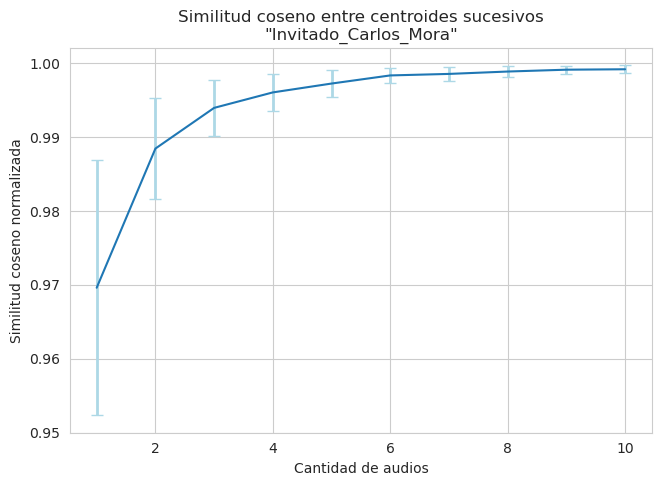

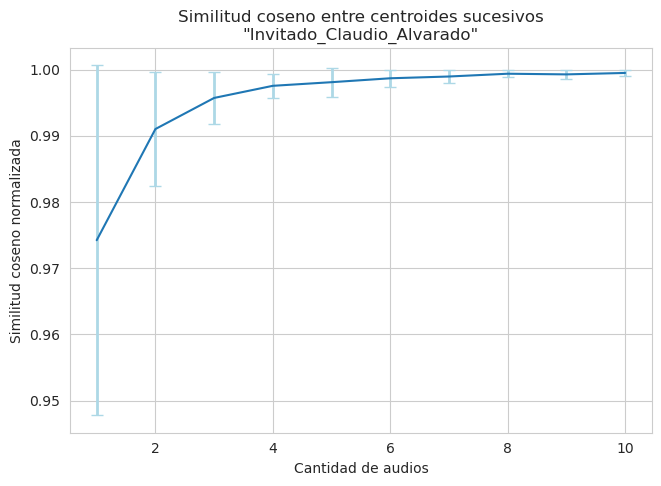

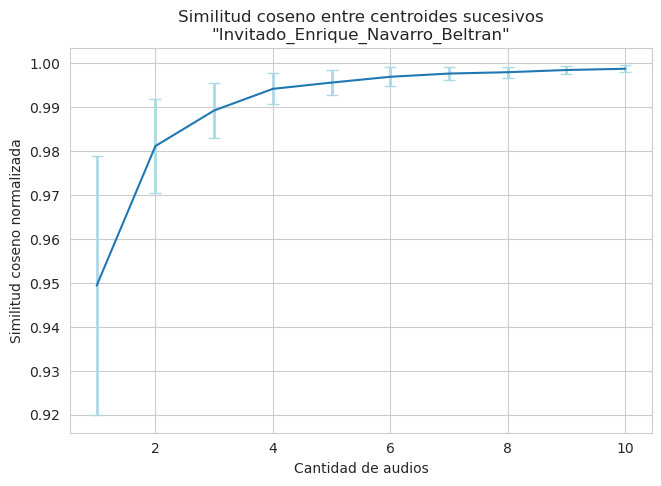

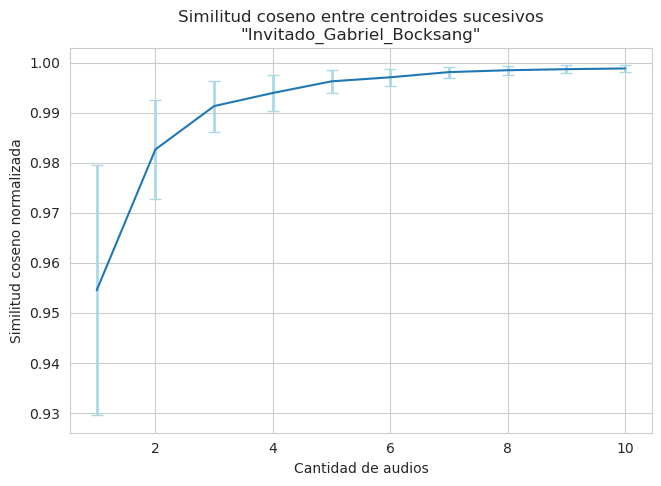

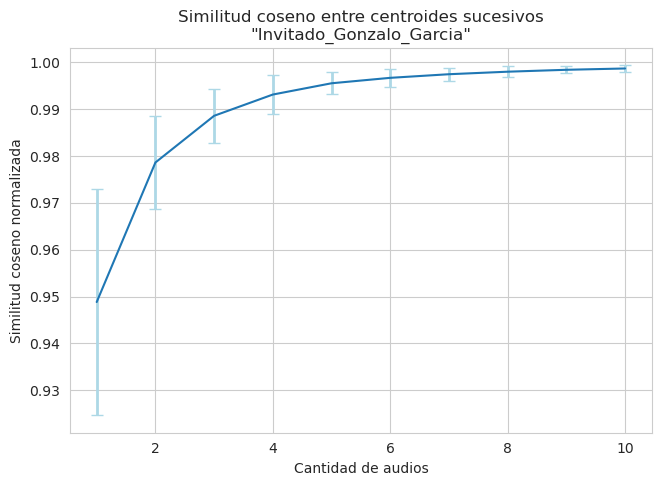

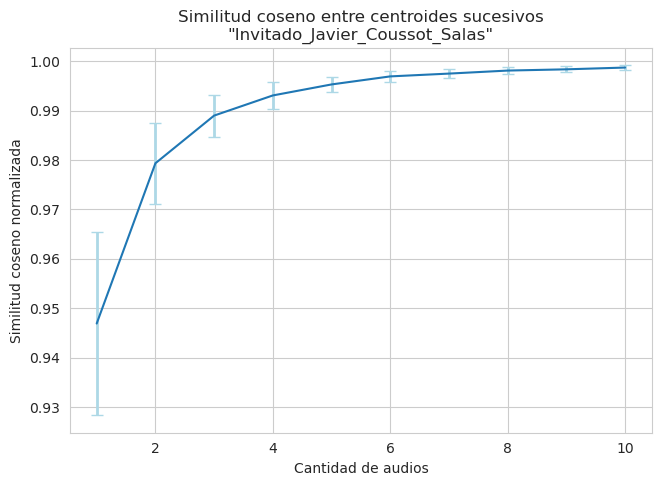

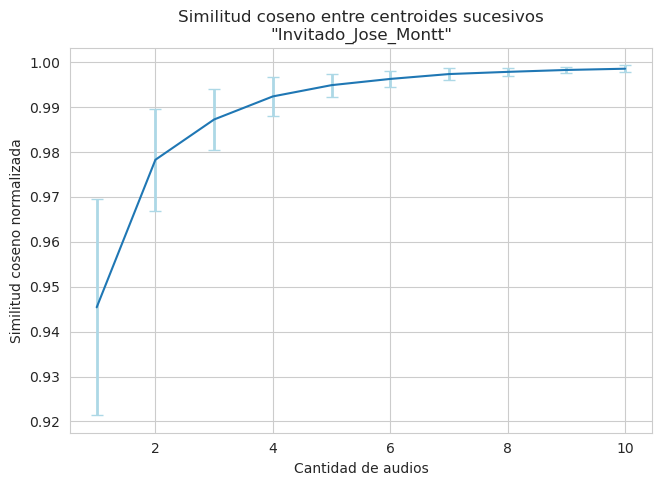

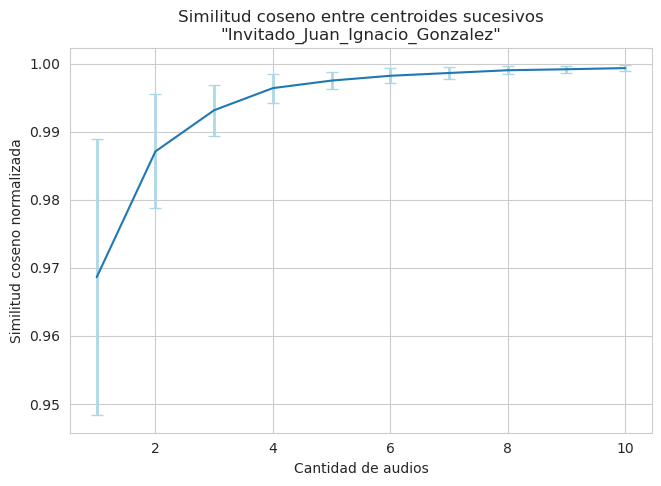

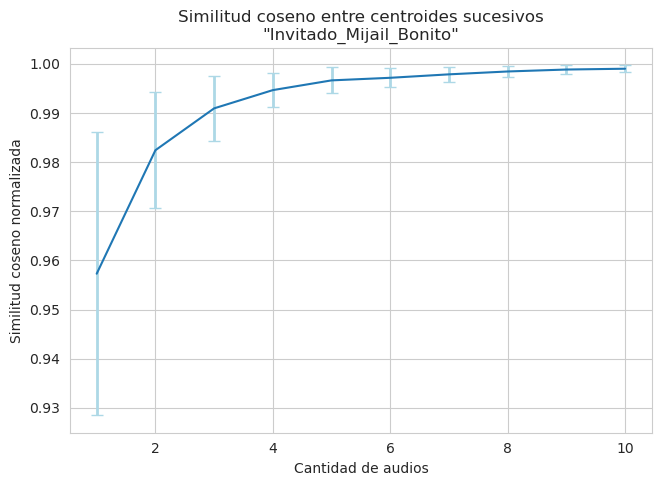

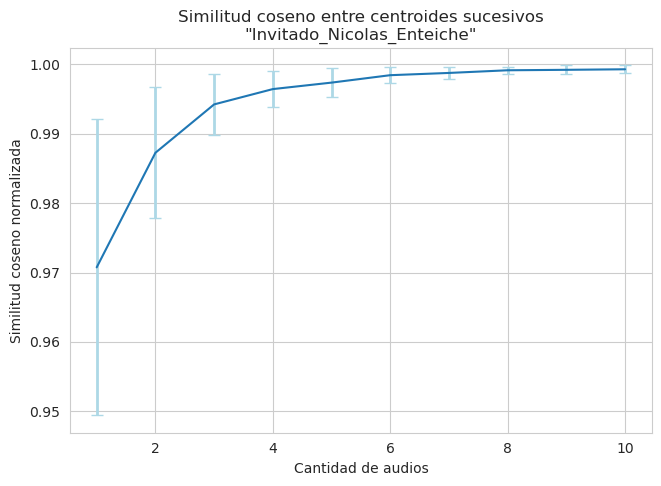

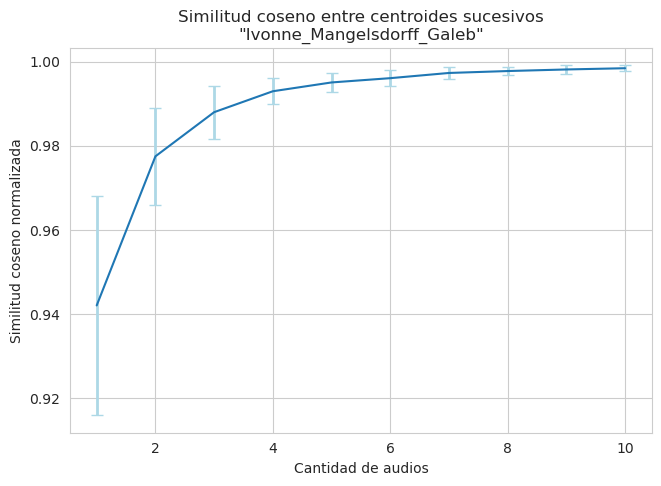

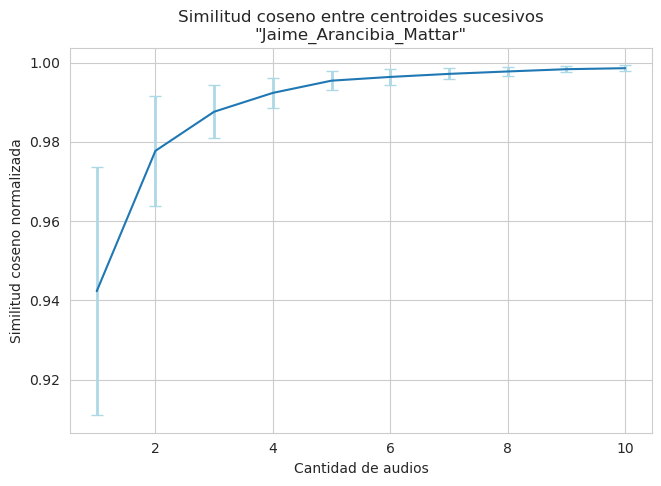

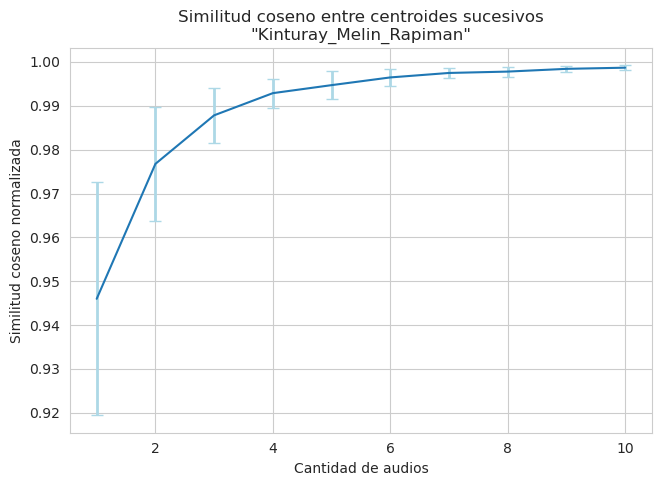

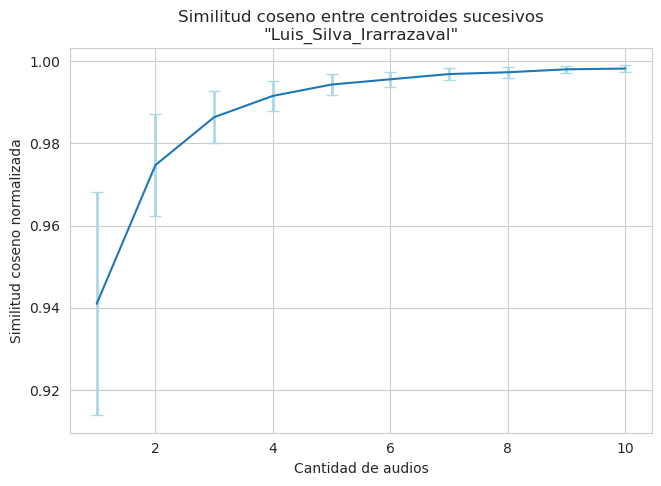

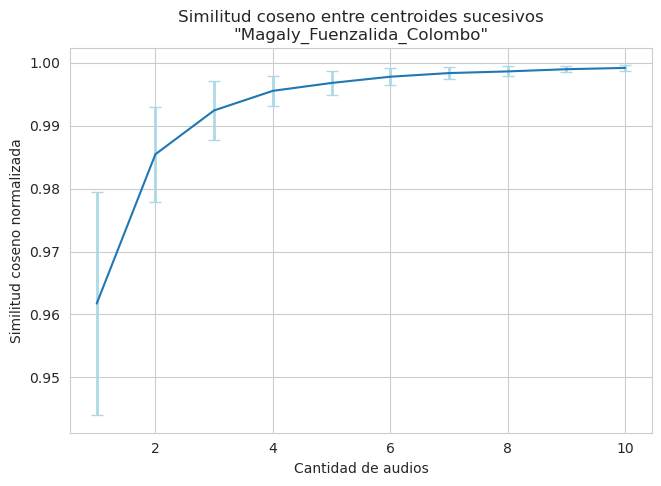

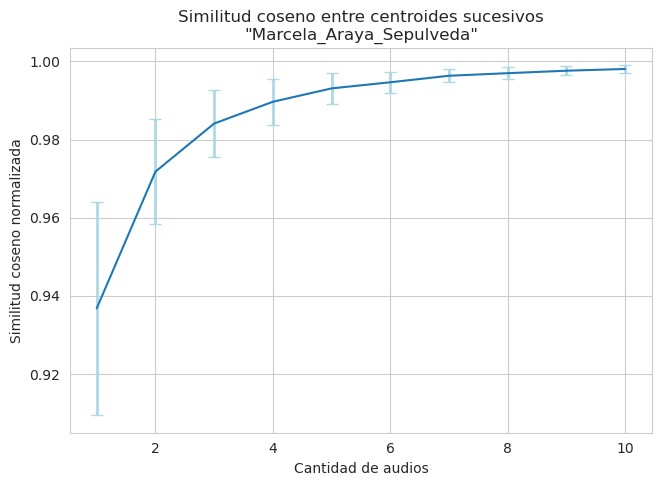

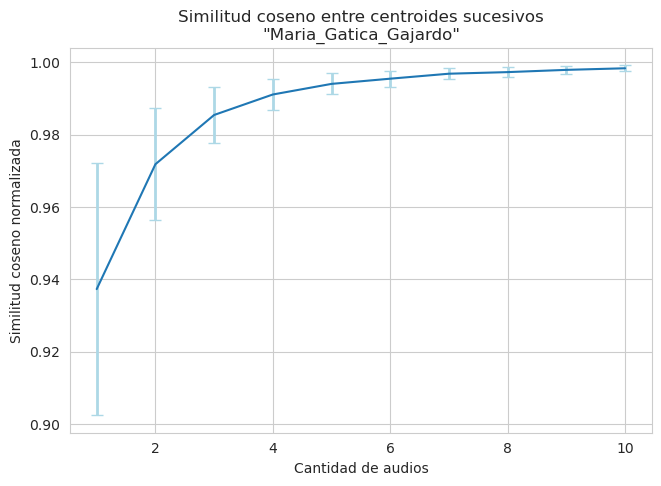

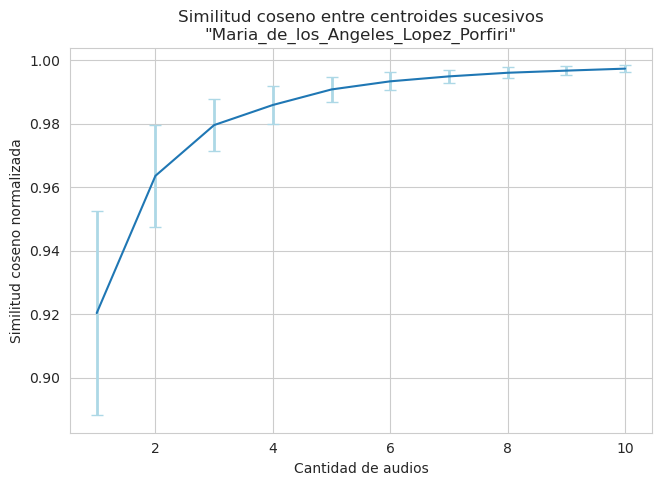

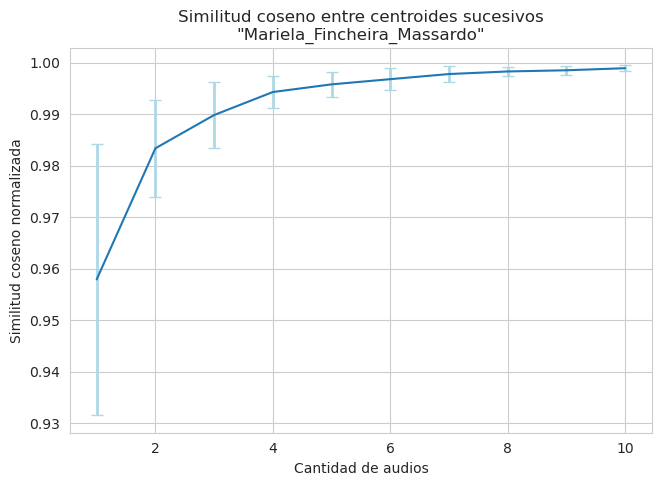

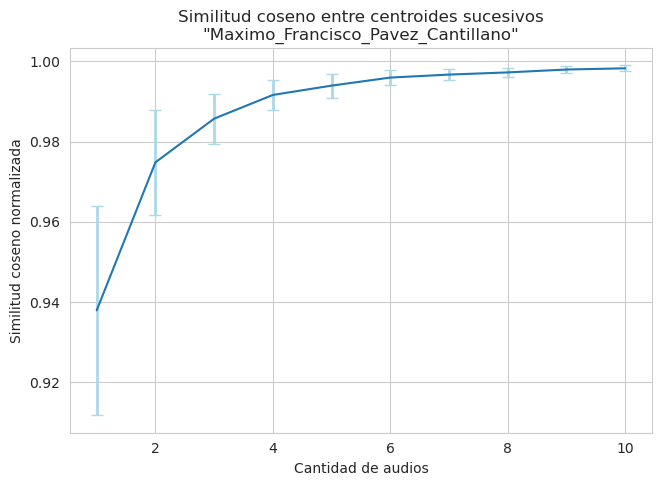

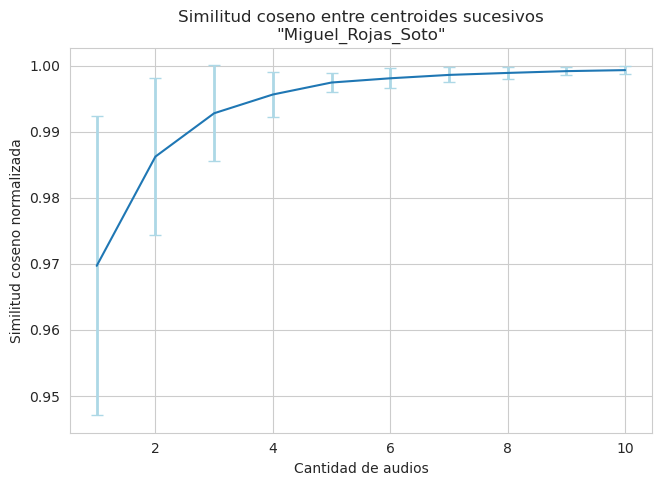

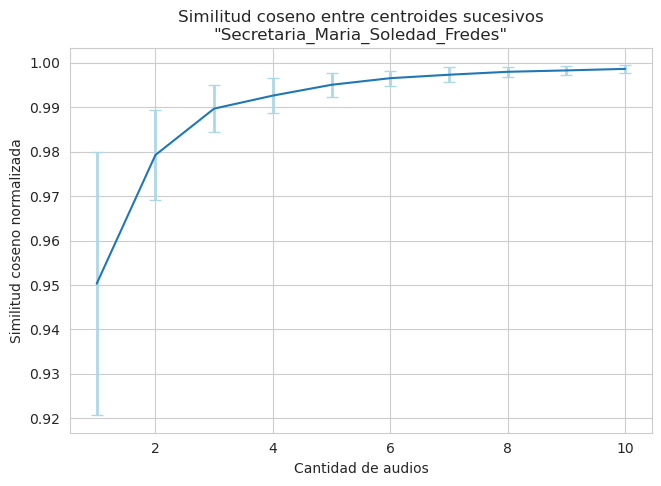

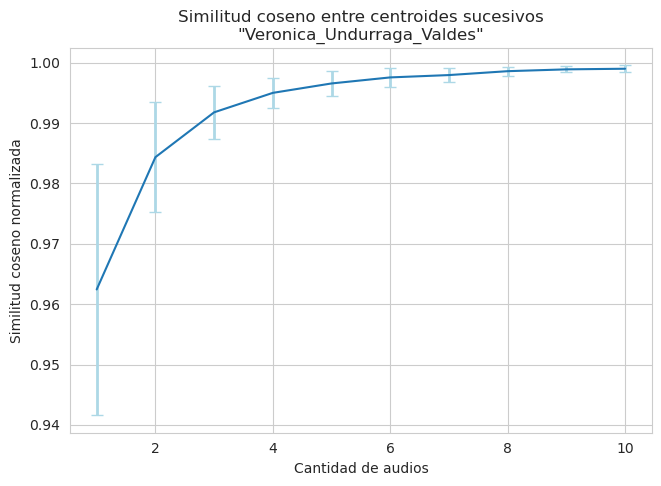

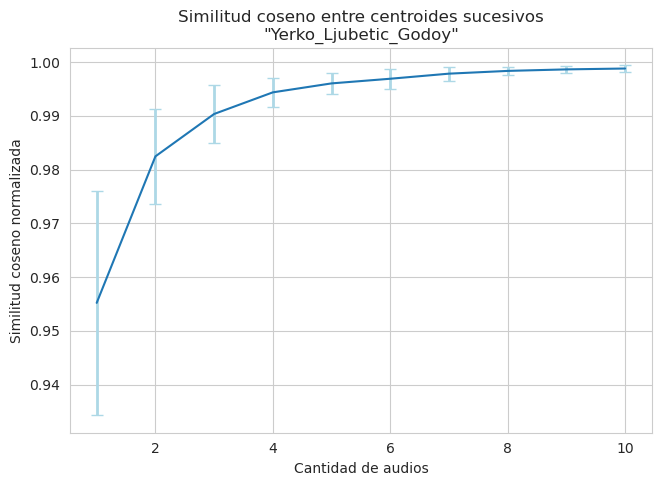

In [34]:
idx = np.arange(1, len(centroids_drift_df) + 1)
for label in valid_labels:
    plt.figure(figsize=(7.5, 5))
    plt.errorbar(idx[:10], centroids_drift_df[f'{label}_mean'][:10], yerr=centroids_drift_df[f'{label}_std'][:10], 
             label='Similitud Coseno Normalizada', fmt='-', ecolor='lightblue', elinewidth=2, capsize=4)
    plt.xlabel('Cantidad de audios')
    plt.ylabel('Similitud coseno normalizada')
    plt.title(f'Similitud coseno entre centroides sucesivos\n"{label}"')

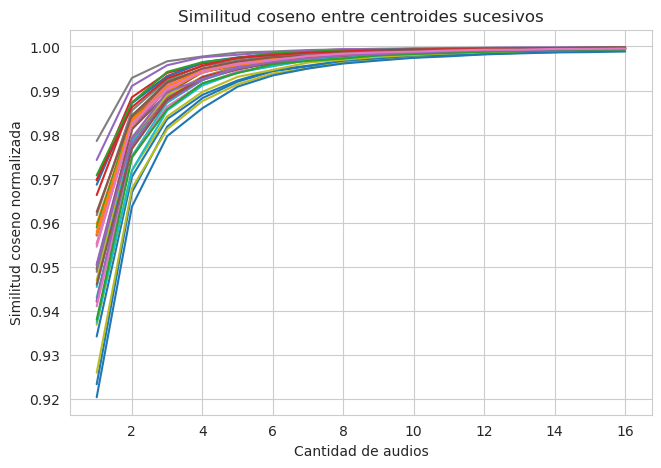

In [37]:
plt.figure(figsize=(7.5, 5))
for label in valid_labels:
    plt.plot(idx[:16], centroids_drift_df[f'{label}_mean'][:16])
    plt.xlabel('Cantidad de audios')
    plt.ylabel('Similitud coseno normalizada')
    plt.title(f'Similitud coseno entre centroides sucesivos')

In [40]:
male = [
 'Alejandro_Kohler_Vargas',
 'Alihuen_Antileo_Navarrete',
 'Carlos_Frontaura_Rivera',
 'Diego_Vargas_Castillo',
 'Domingo_Lovera_Parmo',
 'Fernando_Viveros_Reyes',
 'Hector_Urban_Astete',
 'Invitado_Carlos_Mora',
 'Invitado_Claudio_Alvarado',
 'Invitado_Claudio_Orrego',
 'Invitado_Enrique_Navarro_Beltran',
 'Invitado_Gabriel_Bocksang',
 'Invitado_Gonzalo_Garcia',
 'Invitado_Javier_Coussot_Salas',
 'Invitado_Jose_Montt',
 'Invitado_Juan_Ignacio_Gonzalez',
 'Invitado_Leonardo_Moreno',
 'Invitado_Mijail_Bonito',
 'Invitado_Nicolas_Enteiche',
 'Invitado_Pablo_Aranda',
 'Jaime_Arancibia_Mattar',
 'Jorge_Ossandon_Spoerer',
 'Luis_Silva_Irarrazaval',
 'Maximo_Francisco_Pavez_Cantillano',
 'Miguel_Littin_Cucumides',
 'Miguel_Rojas_Soto',
 'Sebastian_Figueroa_Melo',
 'Secretario_Reynaldo_Nunez',
 'Yerko_Ljubetic_Godoy']

female = [
 'Antonia_Rivas_Palma',
 'Beatriz_Hevia_Willer',
 'Carmen_Montoya_Mayorga',
 'Carolina_Navarrete_Rubio',
 'Catalina_Adriana_Lagos_Tschorne',
 'Invitada_Antonia_Polanco',
 'Invitada_Carmen_Dominguez',
 'Invitada_Cecilia_Jara',
 'Invitada_Giannina_Mondino',
 'Invitada_Javiera_Diaz',
 'Invitada_Josefa_Balmaceda',
 'Invitada_Lidia_Casas',
 'Invitada_Paola_Vega',
 'Invitada_Rosario_Vidal',
 'Ivonne_Mangelsdorff_Galeb',
 'Karen_Araya_Rojas',
 'Katherine_Denisse_Martorell_Awad',
 'Kinturay_Melin_Rapiman',
 'Leslie_Sanchez_Lobos',
 'Lorena_Gallardo_Cardenas',
 'Magaly_Fuenzalida_Colombo',
 'Marcela_Araya_Sepulveda',
 'Marcela_Ines_Peredo_Rojas',
 'Maria_Gatica_Gajardo',
 'Maria_de_los_Angeles_Lopez_Porfiri',
 'Mariela_Fincheira_Massardo',
 'Secretaria_Maria_Soledad_Fredes',
 'Veronica_Undurraga_Valdes']

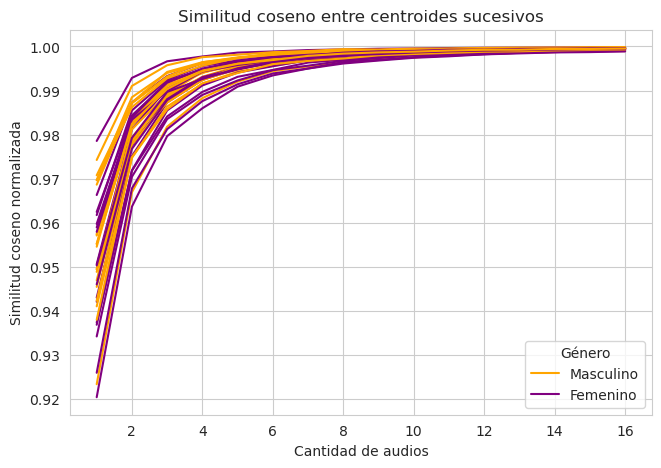

In [49]:
plt.figure(figsize=(7.5, 5))
plt.plot([3], [0.99], label='Masculino', c='orange')
plt.plot([3], [0.99], label='Femenino',c='purple')
for label in valid_labels:
    if label in male:
        plt.plot(idx[:16], centroids_drift_df[f'{label}_mean'][:16], c='orange')
    elif label in female:
        plt.plot(idx[:16], centroids_drift_df[f'{label}_mean'][:16], c='purple')
    plt.xlabel('Cantidad de audios')
    plt.ylabel('Similitud coseno normalizada')
    plt.title(f'Similitud coseno entre centroides sucesivos')
    plt.legend(title='Género', loc='lower right')

In [119]:
x = set(male)
y = set(female)
x.union(y) == set(centroid_labels)

True

In [122]:
# Create a list of tuples (index, label), then sort it by gender
sorted_indices = sorted((idx, label) for idx, label in enumerate(labels)
                        if label in male + female)

sorted_indices

[]

In [120]:
# Create a list of tuples (index, label), then sort it by gender
sorted_indices = sorted((idx, label) for idx, label in enumerate(labels)
                        if label in male + female)

# Sort indices by putting male speakers, then female
male_indices = [idx for idx, label in sorted_indices if label in male]
female_indices = [idx for idx, label in sorted_indices if label in female]
sorted_indices = male_indices + female_indices

In [82]:
import pandas as pd

# Convert the nested dictionary to a DataFrame
labels_i = list(mean_cosine_similarities.keys())
labels_j = list(centroids.keys())  # Centroid labels, assuming this is defined

# Initialize an empty DataFrame
cosine_similarity_df = pd.DataFrame(index=labels_i, columns=labels_j)

# Populate the DataFrame with mean cosine similarities
for label_i in labels_i:
    for label_j in labels_j:
        cosine_similarity_df.at[label_i, label_j] = mean_cosine_similarities[label_i][label_j]

# Ensure all data is in float format for plotting
cosine_similarity_df = cosine_similarity_df.astype(float)

In [121]:
sorted_indices

[]

In [114]:
embeddings_array[sorted_indices]

array([], shape=(0, 192), dtype=float32)

In [110]:
# Reorder the embeddings array
sorted_embeddings_array = embeddings_array[sorted_indices]

# For the cosine similarity DataFrame, we also reorder the rows
sorted_cosine_similarity_df = cosine_similarity_df.iloc[sorted_indices]

# Assuming column labels are also to be reordered if they represent speakers
if set(cosine_similarity_df.columns).issubset(male + female):
    sorted_columns = [col for col in cosine_similarity_df.columns if col in male] + \
                     [col for col in cosine_similarity_df.columns if col in female]
    sorted_cosine_similarity_df = sorted_cosine_similarity_df[sorted_columns]

In [111]:
sorted_embeddings_array

array([], shape=(0, 192), dtype=float32)

In [106]:
# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size to fit your specific number of labels
ax = sns.heatmap(sorted_cosine_similarity_df, cmap='viridis', fmt=".2f")
ax.set_title('Mean Cosine Similarity Between Embedding Labels and Centroid Labels')
ax.set_xlabel('Centroid Labels')
ax.set_ylabel('Embedding Labels')
plt.xticks(rotation=90)  # Rotate column labels for better readability
plt.yticks(rotation=0)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size to fit your specific number of labels
ax = sns.heatmap(cosine_similarity_df, cmap='viridis', fmt=".2f")
ax.set_title('Mean Cosine Similarity Between Embedding Labels and Centroid Labels')
ax.set_xlabel('Centroid Labels')
ax.set_ylabel('Embedding Labels')
plt.xticks(rotation=90)  # Rotate column labels for better readability
plt.yticks(rotation=0)
plt.show()

NameError: name 'cosine_similarity_df' is not defined

<Figure size 1200x800 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 40))  # Adjust the size to handle the large matrix
ax = sns.heatmap(similarity_matrix >.7, cmap='viridis', xticklabels=embeddings.keys(), yticklabels=False)
ax.set_title('Cosine Similarity Between Embeddings and Centroids')
ax.set_xlabel('Centroids')
ax.set_ylabel('Embeddings')
plt.show()

AttributeError: 'list' object has no attribute 'keys'

<Figure size 2000x4000 with 0 Axes>

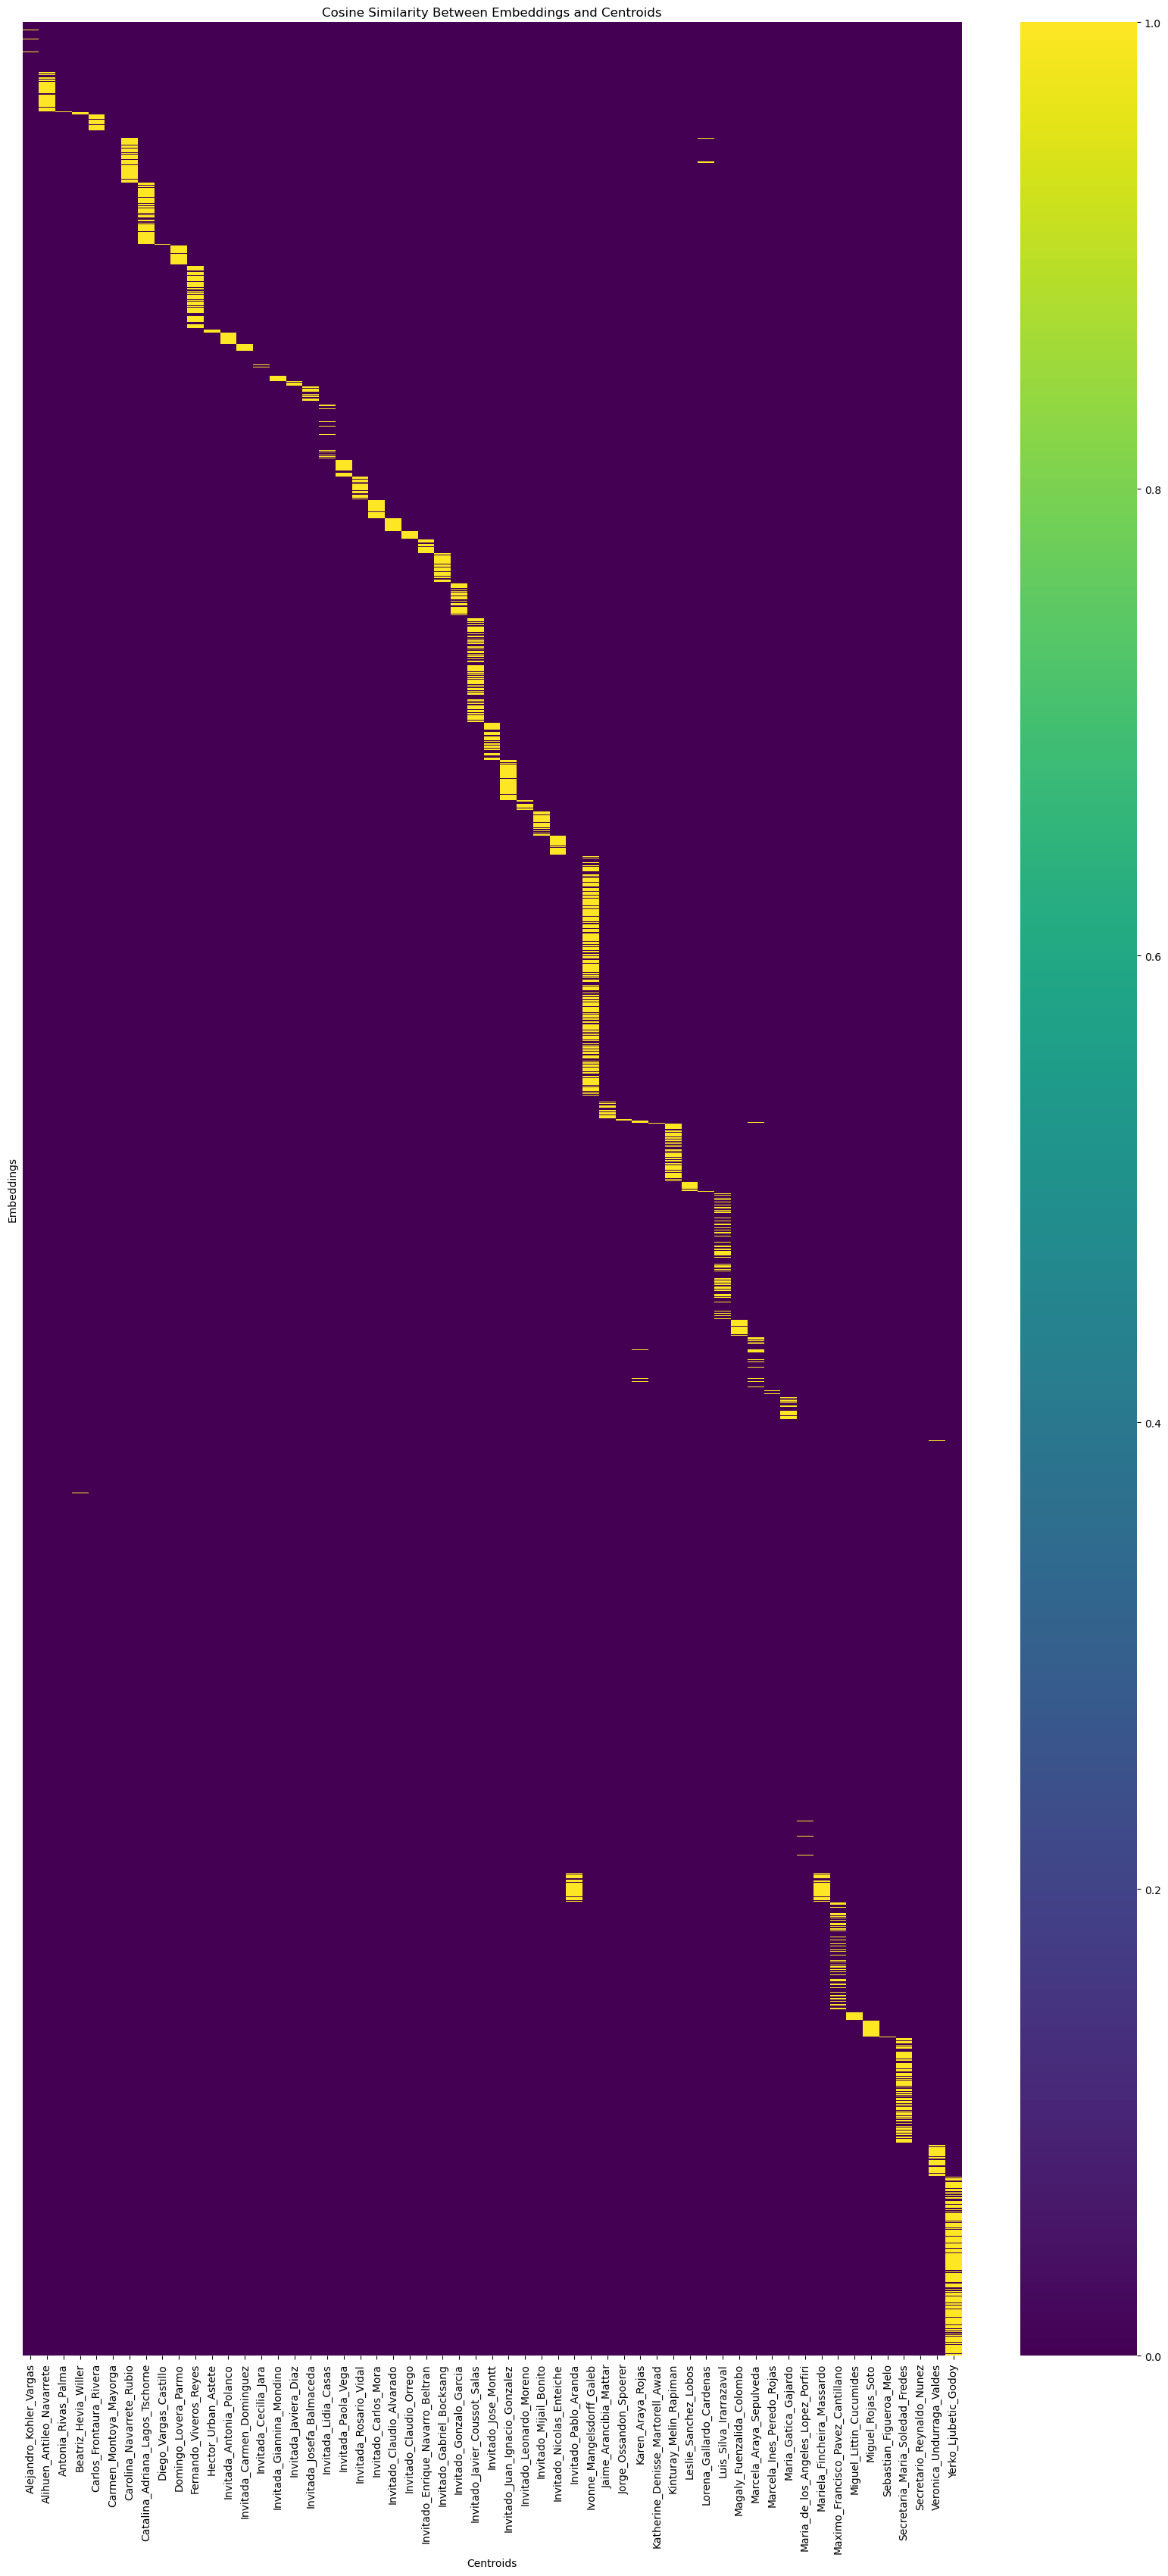

In [28]:
plt.figure(figsize=(20, 40))  # Adjust the size to handle the large matrix
ax = sns.heatmap(np.abs(similarity_matrix)>.6, cmap='viridis', xticklabels=embeddings.keys(), yticklabels=False)
ax.set_title('Cosine Similarity Between Embeddings and Centroids')
ax.set_xlabel('Centroids')
ax.set_ylabel('Embeddings')
plt.show()

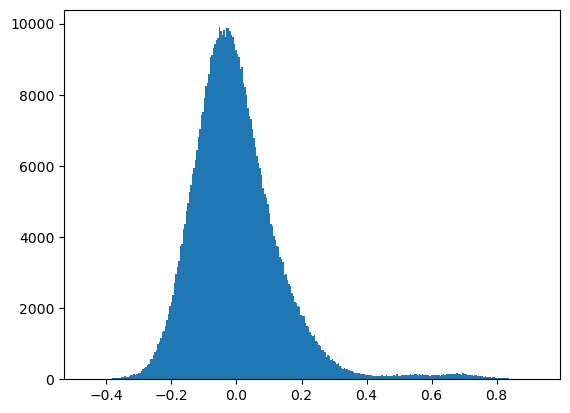

In [32]:
plt.hist((similarity_matrix).reshape(-1), bins=300);
#plt.yscale("log")

In [33]:
a = np.vstack(all_embeddings)

In [36]:
a

array([[-0.06897517, -0.05414196,  0.06097658, ..., -0.0272247 ,
         0.06051932, -0.04344228],
       [ 0.0395584 , -0.05582495,  0.04575963, ...,  0.03368031,
        -0.06320056, -0.01052512],
       [ 0.05373601, -0.01926537,  0.058074  , ..., -0.06986475,
        -0.1131865 , -0.0717617 ],
       ...,
       [ 0.0434302 , -0.01863375,  0.11141832, ...,  0.05687591,
        -0.01010055,  0.04494489],
       [ 0.07610386, -0.04430066,  0.05074406, ...,  0.08349352,
        -0.07788533,  0.02240222],
       [ 0.02174916, -0.01224554,  0.07873227, ...,  0.15053266,
        -0.0509986 ,  0.01316411]], dtype=float32)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
c = pca.fit_transform(np.log(np.abs(a)))

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
b = tsne.fit_transform(a)
a.shape

<ipython-input-69-ddf4dadee454>:3: RuntimeWarning: invalid value encountered in log
  b = tsne.fit_transform(np.log(a))


ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import umap

reducer = umap.UMAP()
u = reducer.fit_transform(a)


AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
classes = [[e for _ in range(len(embeddings[e]))] for e in embeddings]
classes_result = []
for i in classes:
  classes_result += i
# Create a color map from unique string labels to colors
unique_classes = list(np.unique(classes_result))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))  # Generate as many colors as there are unique classes
color_map = dict(zip(unique_classes, colors))

# Map the string labels to colors
class_colors = [color_map[cls] for cls in classes_result]


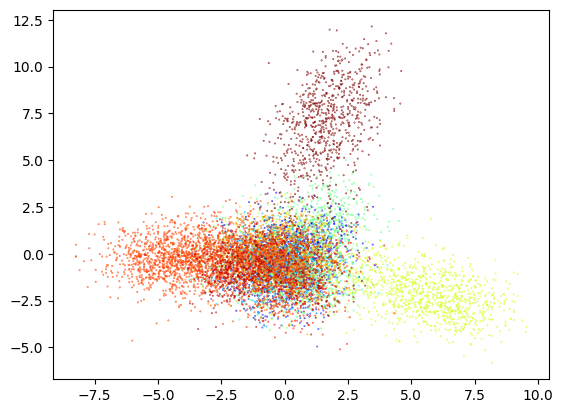

In [ ]:

plt.scatter(*c.T,  color=class_colors, s=.1)

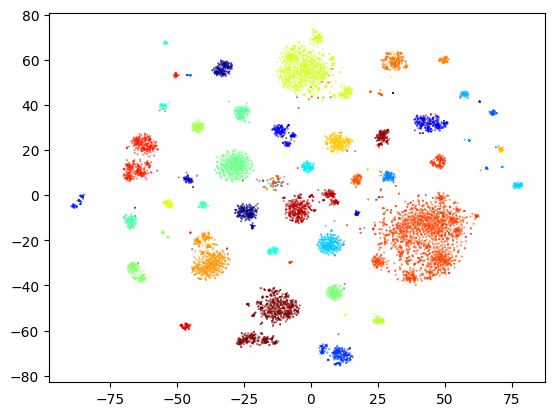

In [ ]:
plt.scatter(*b.T,  color=class_colors, s=.1)

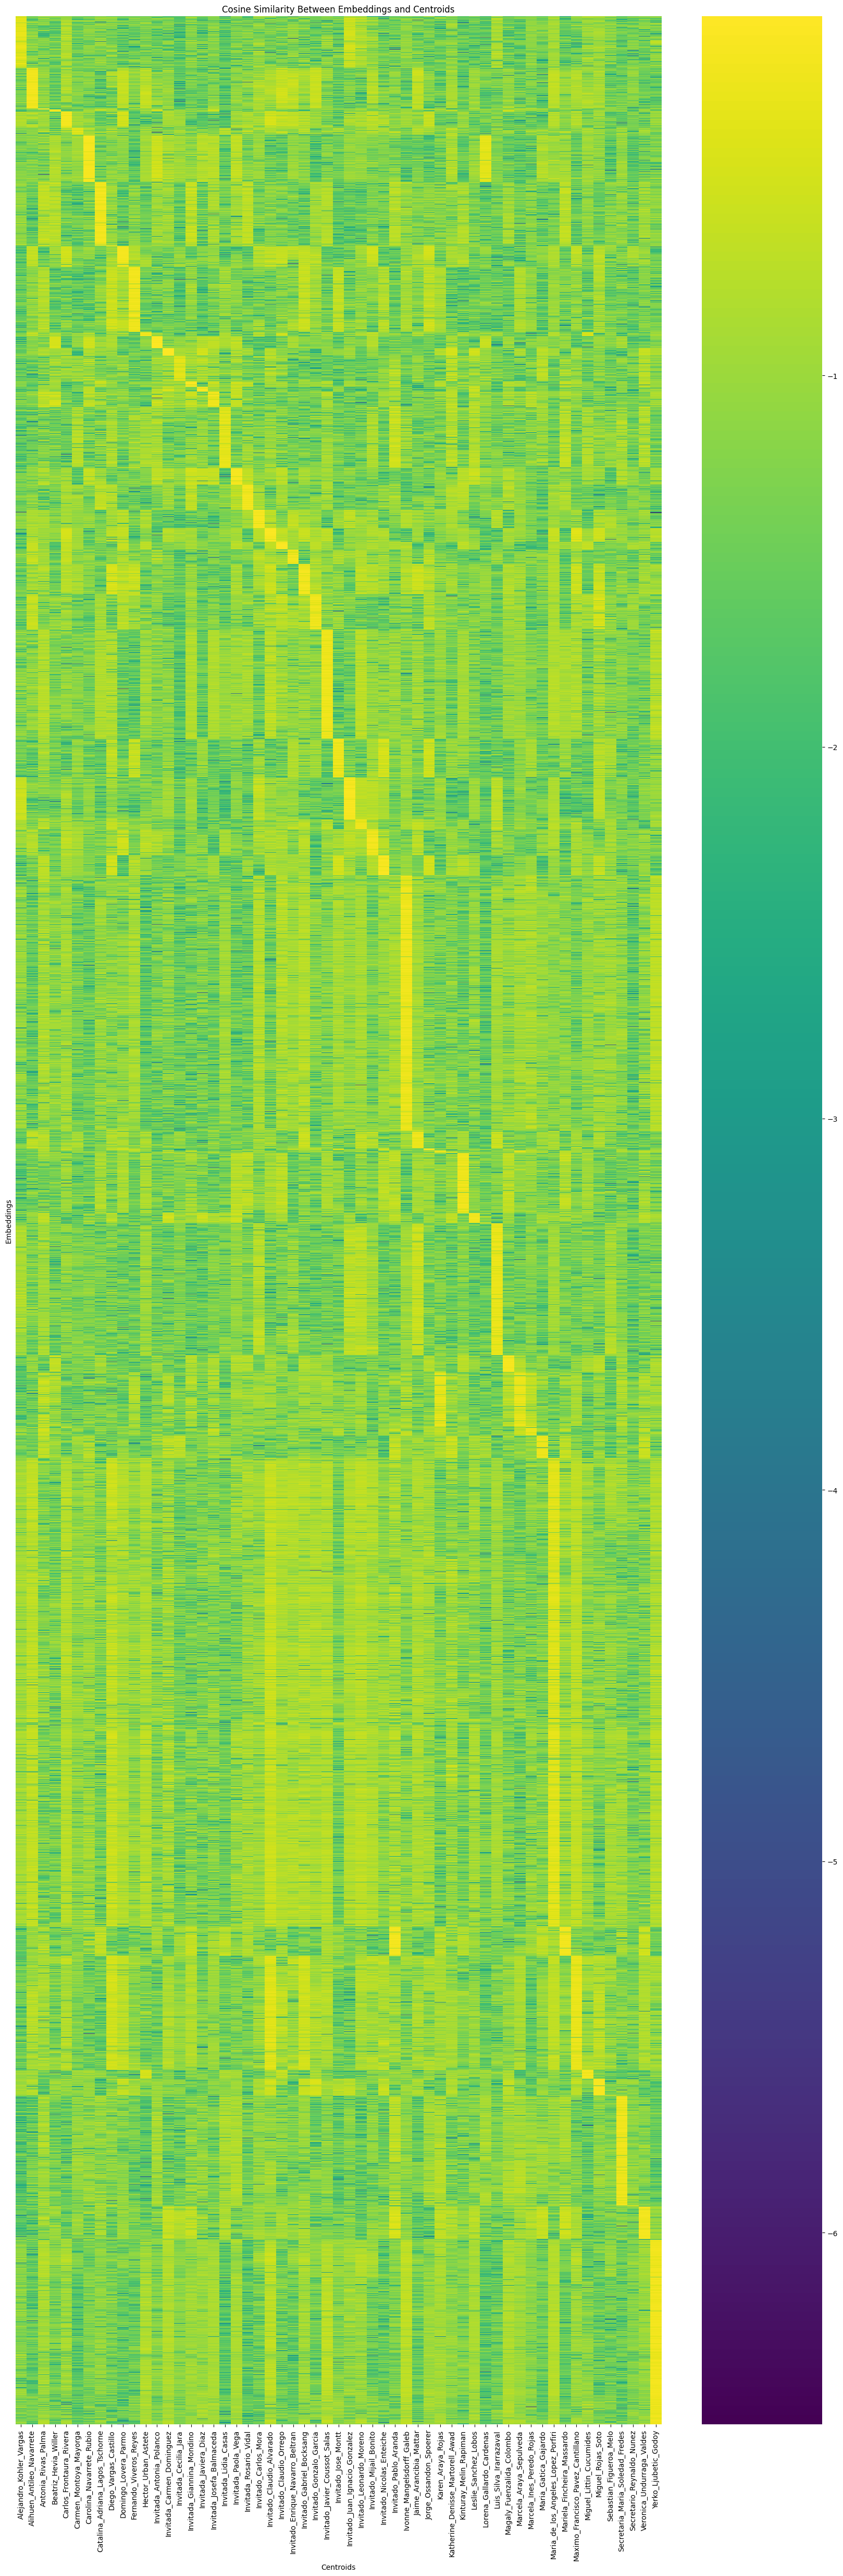

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `similarity_matrix`, `labels`, and `centroid_labels` are already defined

# Create the plot
plt.figure(figsize=(20, 60))  # Adjust the size to handle the large matrix
ax = sns.heatmap(np.log10(np.abs(similarity_matrix)), cmap='viridis', xticklabels=embeddings.keys(), yticklabels=False)
ax.set_title('Cosine Similarity Between Embeddings and Centroids')
ax.set_xlabel('Centroids')
ax.set_ylabel('Embeddings')
plt.show()

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

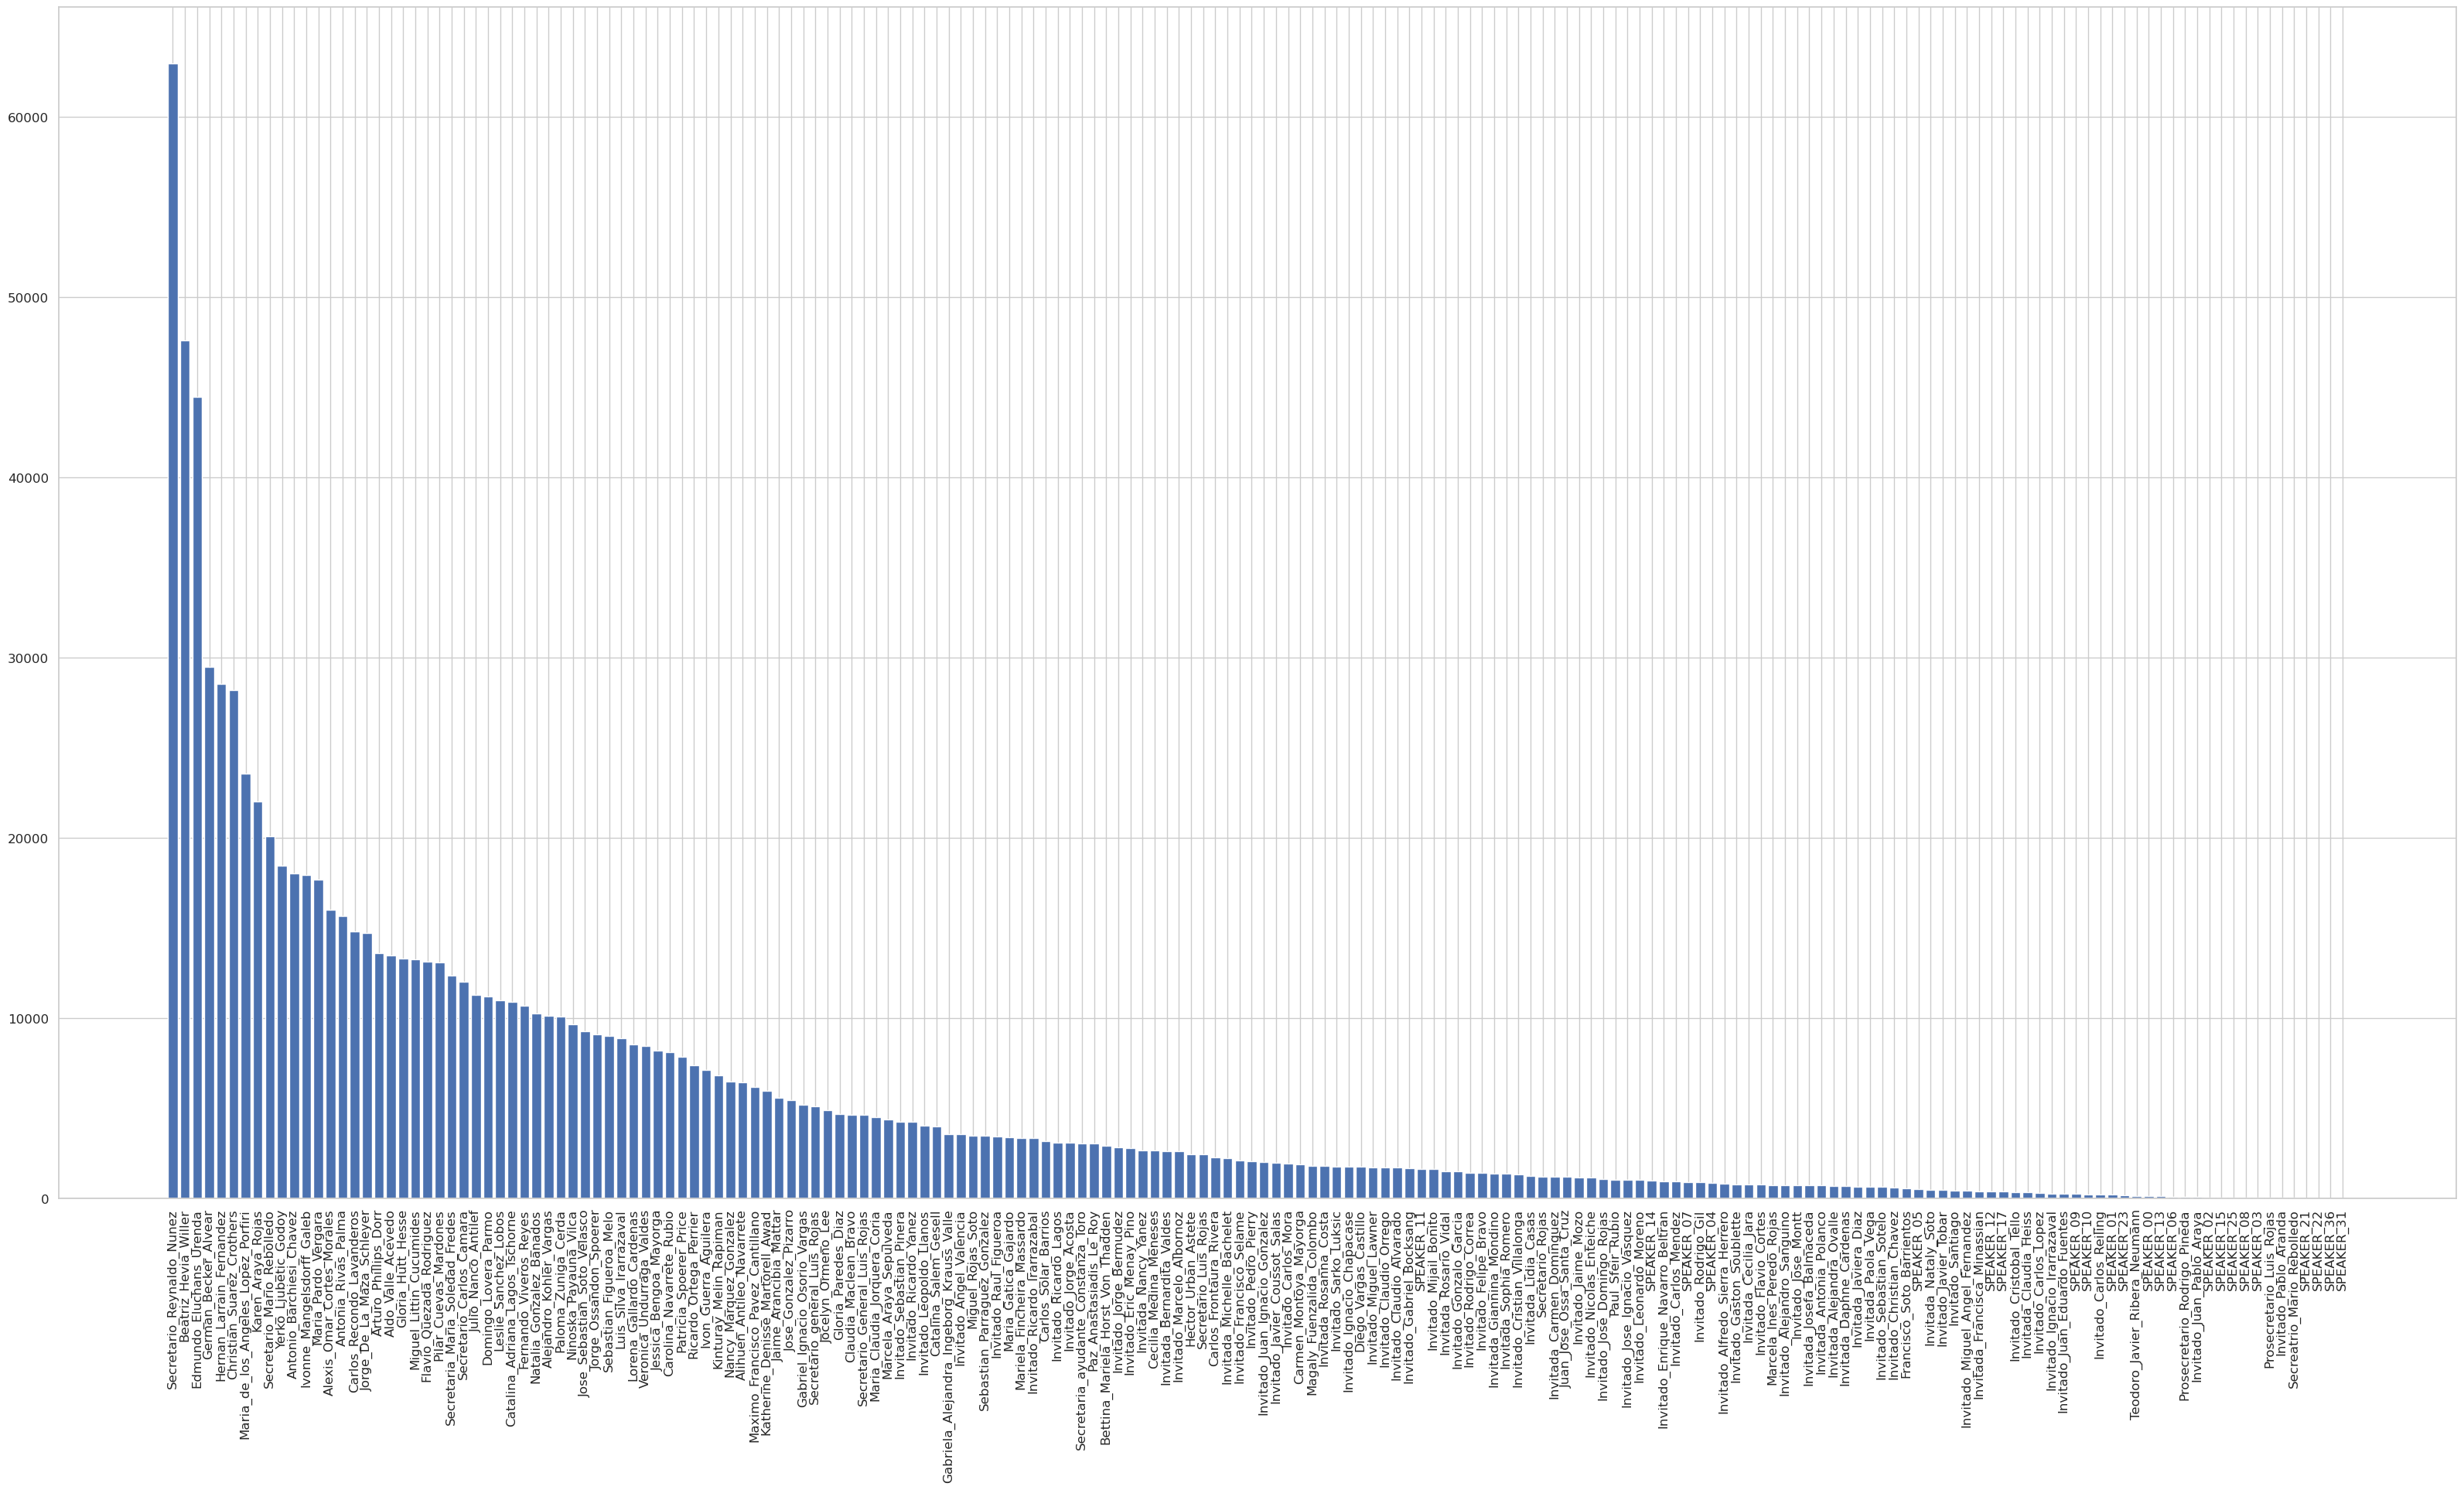

In [3]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

json_path = '/home/edu/spk-recognition/speakers.json'

with open(json_path, 'r') as json_file:
    speakers = json.load(json_file)

x = list(speakers.keys())
y = [sum(speakers[speaker].values()) for speaker in x]

# Pair x and y, sort by y, then unzip
paired = zip(x, y)
sorted_pairs = sorted(paired, key=lambda item: item[1], reverse=True)

# Unzip the pairs
x_sorted, y_sorted = zip(*sorted_pairs)

# Convert the tuples back to lists, if needed
x_sorted = list(x_sorted)
y_sorted = list(y_sorted)

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))
plt.bar(x_sorted, y_sorted)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

In [13]:
import pandas as pd

pd.set_option('display.max_rows', 180)
df = pd.DataFrame({'speaker': x_sorted, 'count': y_sorted})

# Removing guests and unlabeled speakers
mask = df['speaker'].str.contains('vitad', case=False, na=False) | df['speaker'].str.contains('SPEAKER', case=False, na=False)  

# Use the mask to filter out the rows
df_filtered = df[~mask]

df_filtered.reset_index(inplace=True, drop=True)

df_filtered

speaker  count
0                  Secretario_Reynaldo_Nunez  62943
1                       Beatriz_Hevia_Willer  47591
2                    Edmundo_Eluchans_Urenda  44471
3                       German_Becker_Alvear  29469
4                   Hernan_Larrain_Fernandez  28534
5                  Christian_Suarez_Crothers  28194
6         Maria_de_los_Angeles_Lopez_Porfiri  23580
7                          Karen_Araya_Rojas  22010
8                 Secretario_Mario_Rebolledo  20075
9                       Yerko_Ljubetic_Godoy  18463
10                  Antonio_Barchiesi_Chavez  18021
11                 Ivonne_Mangelsdorff_Galeb  17941
12                       Maria_Pardo_Vergara  17681
13                Alexis_Omar_Cortes_Morales  15995
14                       Antonia_Rivas_Palma  15675
15                 Carlos_Recondo_Lavanderos  14818
16                 Jorge_De_La_Maza_Schleyer  14729
17                      Arturo_Phillips_Dorr  13620
18                        Aldo_Valle_Acevedo  13466
19                         Gloria_Hutt_Hesse  13309
20                   Miguel_Littin_Cucumides  13242
21                  Flavio_Quezada_Rodriguez  13139
22                     Pilar_Cuevas_Mardones  13102
23           Secretaria_Maria_Soledad_Fredes  12378
24                  Secretario_Carlos_Camara  12040
25                       Julio_Nanco_Antilef  11296
26                      Domingo_Lovera_Parmo  11216
27                      Leslie_Sanchez_Lobos  11005
28           Catalina_Adriana_Lagos_Tschorne  10903
29                    Fernando_Viveros_Reyes  10697
30                  Natalia_Gonzalez_Banados  10256
31                   Alejandro_Kohler_Vargas  10113
32                       Paloma_Zuniga_Cerda  10067
33                     Ninoska_Payauna_Vilca   9638
34               Jose_Sebastian_Soto_Velasco   9256
35                    Jorge_Ossandon_Spoerer   9090
36                   Sebastian_Figueroa_Melo   9003
37                    Luis_Silva_Irarrazaval   8907
38                  Lorena_Gallardo_Cardenas   8532
39                 Veronica_Undurraga_Valdes   8447
40                    Jessica_Bengoa_Mayorga   8183
41                  Carolina_Navarrete_Rubio   8130
42                    Patricia_Spoerer_Price   7835
43                    Ricardo_Ortega_Perrier   7391
44                      Ivon_Guerra_Aguilera   7129
45                    Kinturay_Melin_Rapiman   6821
46                    Nancy_Marquez_Gonzalez   6477
47                 Alihuen_Antileo_Navarrete   6429
48         Maximo_Francisco_Pavez_Cantillano   6169
49          Katherine_Denisse_Martorell_Awad   5959
50                    Jaime_Arancibia_Mattar   5588
51                     Jose_Gonzalez_Pizarro   5443
52             Gabriel_Ignacio_Osorio_Vargas   5179
53             Secretario_general_Luis_Rojas   5113
54                        Jocelyn_Ormeno_Lee   4876
55                       Gloria_Paredes_Diaz   4689
56                     Claudia_Maclean_Bravo   4650
57             Secretario_General_Luis_Rojas   4619
58              Maria_Claudia_Jorquera_Coria   4521
59                   Marcela_Araya_Sepulveda   4380
60                     Catalina_Salem_Gesell   4012
61  Gabriela_Alejandra_Ingeborg_Krauss_Valle   3582
62                         Miguel_Rojas_Soto   3490
63              Sebastian_Parraguez_Gonzalez   3476
64                      Maria_Gatica_Gajardo   3373
65                Mariela_Fincheira_Massardo   3364
66                      Carlos_Solar_Barrios   3176
67        Secretaria_ayudante_Constanza_Toro   3059
68                   Paz_Anastasiadis_Le_Roy   3031
69         Bettina_Mariela_Horst_Von_Thadden   2930
70                    Cecilia_Medina_Meneses   2654
71                       Hector_Urban_Astete   2462
72                     Secretario_Luis_Rojas   2455
73                   Carlos_Frontaura_Rivera   2282
74                    Carmen_Montoya_Mayorga   1896
75                 Magaly_Fuenzalida_Colombo   1810
76                     Diego_Varg

Secreatrio_Mario_Rebolledo, Secretario_Mario_Rebolledo
